In [1]:
#all collumns of pandas dataframes are printed out with the following option
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from tqdm.notebook import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

# NSL-KDD dataset
The NSL-KDD dataset solves a lot of the problems the KDD'99 dataset has.
They identified samples that are hard to classify by using some basic machine learning algorithms.

The NSL-KDD dataset has following properties:
* More even spread of different label values by stratified sampling
* Removed copies of rows normal and easy to classify attacks by downsampling
* Kept harder to classify rows seperate.
* Used a more advanced form of upsampling.

More information can be found here, reading over these can be usefull for the assignment.\
Website: https://www.unb.ca/cic/datasets/nsl.html \
Paper: https://www.ee.ryerson.ca/~bagheri/papers/cisda.pdf


There are multiple datasets in this assignment.
* KDDTrain+.txt, the full training set. 
* KDDTest+.txt, the full test set. 
* KDDTest-21.txt, test set where no samples have #correctly_predicted = 21


## Data analysis

#### 1) Load in all the datasets.

In [2]:
train_df = pd.read_csv('KDDTrain+.txt')
test_df = pd.read_csv('KDDTest+.txt')
test21_df = pd.read_csv('KDDTest-21.txt')

In [3]:
train_df.head(5)

,Unnamed: 0,Unnamed: 0.1,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,#correctly_predicted
0,0,0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,1,1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,2,2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,3,3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,4,4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test_df.head(5)

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,#correctly_predicted
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
test21_df.head(5)

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,#correctly_predicted
0,13,tcp,telnet,SF,118,2425,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.0,26,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.0,1.00,0.0,0.0,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap,17


In [6]:
print(train_df.shape)
print(test_df.shape)
print(test21_df.shape)

(125973, 45)
(22544, 43)
(11850, 43)


#### 2) Leave non-relevant columns out, This step is the same as for KDD'99. Some columns containing numbers do not help an ML algorithm in predicting the labels. Find out what these column(s) are and remove them from your dataset.\**Hint**: use statistics of the columns to make your decision, no security knowledge is needed.

The training set has 2 irrelevant columns at the first sight. This will be removed first.

In [7]:
# remove columns Unnamed: 0, Unnamed: 0.1
train_df = train_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
train_df.head(5)

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,#correctly_predicted
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
print(train_df.shape)
print(test_df.shape)
print(test21_df.shape)

(125973, 43)
(22544, 43)
(11850, 43)


In [9]:
train_df.describe()

,duration,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,#correctly_predicted
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:
test_df.describe()

,duration,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,#correctly_predicted
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,0.002440,0.000266,0.114665,0.008738,0.001153,0.003549,0.0,0.000488,0.028433,79.028345,31.124379,0.102924,0.103635,0.238463,0.235179,0.740345,0.094074,0.098110,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683,18.017965
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,0.049334,0.021060,8.041614,0.676842,0.048014,0.067829,0.0,0.022084,0.166211,128.539248,89.062532,0.295367,0.298332,0.416118,0.416215,0.412496,0.259138,0.253545,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875,4.270361
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.250000,16.000000,0.000000,0.000000,0.250000,0.072500,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [11]:
test21_df.describe()

,duration,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,#correctly_predicted
count,11850.000000,1.185000e+04,1.185000e+04,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.0,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000,11850.000000
mean,415.439831,1.945644e+04,1.228105e+03,0.000591,0.016034,0.001350,0.190211,0.041181,0.253080,0.227679,0.004304,0.000506,0.218059,0.016203,0.002194,0.003882,0.0,0.000928,0.052911,94.116118,48.269451,0.113841,0.114590,0.274313,0.268355,0.753008,0.157149,0.096762,213.945401,117.541603,0.539597,0.148986,0.206493,0.024465,0.104181,0.106697,0.263952,0.252209,15.326835
std,1919.441623,6.519865e+05,2.389603e+04,0.024299,0.196379,0.050299,1.222392,0.205401,0.434795,10.025774,0.065465,0.029046,11.090938,0.933202,0.066210,0.076763,0.0,0.030455,0.223866,153.418960,119.213908,0.305945,0.309216,0.430353,0.430249,0.399044,0.338761,0.278665,82.203728,106.563438,0.423370,0.288758,0.379193,0.114234,0.265086,0.278549,0.377337,0.403039,4.407479
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,255.000000,12.000000,0.070000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
50%,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,83.000000,0.530000,0.020000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,17.000000
75%,1.000000,1.600000e+02,9.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,132.000000,16.000000,0.000000,0.000000,0.840000,0.797500,1.000000,0.060000,0.000000,255.000000,250.000000,1.000000,0.070000,0.090000,0.000000,0.010000,0.000000,0.560000,0.520000,18.000000
max,57715.000000,6.282565e+07,1.288652e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000


- Based on the statistics, num_outbound_cmds seems to be irrelevant as there are only zeros.

In [12]:
train_df = train_df.drop('num_outbound_cmds', axis=1)
test_df = test_df.drop('num_outbound_cmds', axis=1)
test21_df = test21_df.drop('num_outbound_cmds', axis=1)

In [13]:
print(train_df.shape)
print(test_df.shape)
print(test21_df.shape)

(125973, 42)
(22544, 42)
(11850, 42)


In [14]:
# check for missing values
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_byts                       0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [15]:
# check for missing values
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_byts                       0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [16]:
# check for missing values
test21_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_byts                       0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_hot_login                   0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_c

In [17]:
# check for highly correlated variables and remove it - training set

# Create correlation matrix
corr_matrix = train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['num_root', 'srv_error_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']


columns: 
- 'num_root'
- 'srv_error_rate'
- 'srv_rerror_rate'
- 'dst_host_serror_rate' is not removed as this is not high correlated in test and test21 set and might contain important information
- 'dst_host_srv_serror_rate' is not removed as this is not high correlated in test and test21 set and might contain important information
- 'dst_host_srv_rerror_rate' is not removed as this is not high correlated in test and test21 set and might contain important information

In [18]:
# Drop features - training set
train_df.drop(['num_root', 'srv_error_rate', 'srv_rerror_rate'], axis=1, inplace=True)

In [19]:
print(train_df.shape)

(125973, 39)


In [20]:
# check for highly correlated variables and remove it - test set

# Create correlation matrix
corr_matrix = test_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['num_root', 'srv_error_rate', 'srv_rerror_rate']


- 'num_root'
- 'srv_error_rate'
- 'srv_rerror_rate'

In [21]:
# Drop features - test set
test_df.drop(to_drop, axis=1, inplace=True)

In [22]:
print(test_df.shape)

(22544, 39)


In [23]:
# check for highly correlated variables and remove it - test21 set

# Create correlation matrix
corr_matrix = test21_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['num_root', 'srv_error_rate', 'srv_rerror_rate']


- 'num_root'
- 'srv_error_rate'
- 'srv_rerror_rate'

In [24]:
# Drop features - test21 set
test21_df.drop(to_drop, axis=1, inplace=True)

In [25]:
print(test21_df.shape)

(11850, 39)


#### 3) Look at how the label values are spread out, you can visualize this with bar plots.

In [26]:
# training set
train_df['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

<AxesSubplot:>

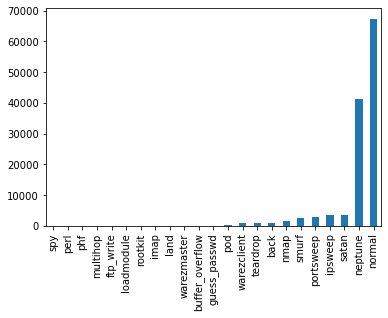

In [27]:
train_df['label'].value_counts().sort_values().plot(kind = 'bar')

In [28]:
# test set
test_df['label'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
sqlattack             2
perl                  2
loadmodule            2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64

<AxesSubplot:>

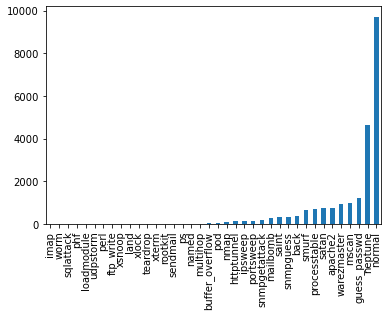

In [29]:
test_df['label'].value_counts().sort_values().plot(kind = 'bar')

In [30]:
# test21 set 
test21_df['label'].value_counts()

normal             2152
neptune            1579
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               727
processtable        685
smurf               627
back                359
snmpguess           331
saint               309
mailbomb            293
snmpgetattack       178
portsweep           156
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
perl                  2
udpstorm              2
worm                  2
sqlattack             2
phf                   2
imap                  1
Name: label, dtype: int64

<AxesSubplot:>

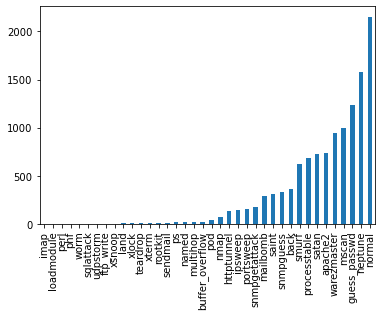

In [31]:
test21_df['label'].value_counts().sort_values().plot(kind = 'bar')

### Preprocessing

### Training set

#### 1) Look at the contents and statistics of the numerical columns and choose which to rescale.

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_byts                     125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [33]:
# copy training set
train_df_clean = train_df.copy()

In [34]:
# remove correctly predicted
train_df = train_df.drop('#correctly_predicted', axis=1)
train_df.head()

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [35]:
list(train_df.select_dtypes(['float64']).columns)

['serror_rate',
 'rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [36]:
# scale int64 attributes
from sklearn.preprocessing import MinMaxScaler
num_feat = train_df.select_dtypes(include=['int64']).columns
train_df[num_feat] = MinMaxScaler().fit_transform(train_df[num_feat])



In [37]:
# data after normalisation
train_df.head()

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,tcp,ftp_data,SF,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0.0,tcp,http,SF,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


#### 2) Look at categorical columns in text format and choose which to encode.

In [38]:
train_df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [39]:
train_df['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [40]:
train_df['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [41]:
train_df['label'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In total we have 4 categorical columns, all 4 needs to be encoded as this is required for training the model.

In [42]:
# selecting categorical data attributes
cat_col = ['protocol_type','flag']

In [43]:
# creating a dataframe with only categorical attributes
categorical = train_df[cat_col]
categorical.head()

,protocol_type,flag
0,tcp,SF
1,udp,SF
2,tcp,S0
3,tcp,SF
4,tcp,SF


In [44]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,1,0,0,0,0,0
125969,0,0,1,0,0,0,0,0,0,0,0,0,1,0
125970,0,1,0,0,0,0,0,0,0,0,0,0,1,0
125971,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [45]:
train_df = pd.concat([train_df,categorical], axis=1)
train_df = train_df.drop(['protocol_type', 'flag'], axis=1)
train_df

,duration,service,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,ftp_data,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,other,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,private,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,http,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,http,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,private,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360078,0.048924,1.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0,1,0,0,0,0,0,0,1,0,0,0,0,0
125969,0.000186,private,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,0,0,1,0,0,0,0,0,0,0,0,0,1,0
125970,0.000000,smtp,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
125971,0.000000,klogin,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281800,0.015656,1.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,0,1,0,0,0,0,0,0,1,0,0,0,0,0


#### 3) Make binary labels for attacks (=1) or not attacks(=0)

In [46]:
train_df['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [47]:
# convert label column to binary
label = {'normal': 0, 'neptune': 1, 'satan': 1, 'ipsweep': 1, 'portsweep': 1, 'smurf': 1,
         'nmap': 1, 'back': 1, 'teardrop': 1, 'warezclient': 1, 'pod': 1, 'guess_passwd': 1,
         'buffer_overflow': 1, 'warezmaster': 1, 'land': 1, 'imap': 1, 'rootkit': 1, 'loadmodule': 1,
         'ftp_write': 1, 'multihop': 1, 'phf': 1, 'perl': 1, 'spy': 1}

train_df['label'] = [label[item] for item in train_df['label']]
train_df['label'].unique()
# check value count of label
train_df['label'].value_counts()

0    67343
1    58630
Name: label, dtype: int64

In [48]:
# mean encoding for the service column as it has a high cardinality
means = train_df.groupby('service')['label'].mean()

train_df['service']= train_df['service'].map(means)

In [49]:
train_df

,duration,service,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.273469,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.402615,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.955063,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.000000,0.056746,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.056746,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.955063,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.360078,0.048924,1.0,0.0,0.14,0.06,0.00,1.000000,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
125969,0.000186,0.955063,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,1.00,0.00,0.00,1.000000,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
125970,0.000000,0.038835,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,1.000000,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
125971,0.000000,1.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281800,0.015656,1.0,0.0,0.06,0.05,0.00,1.000000,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0


### Test set

#### 1) Look at the contents and statistics of the numerical columns and choose which to rescale.

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_byts                     22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [51]:
# copy test set
test_df_clean = test_df.copy()

In [52]:
# remove correctly predicted
test_df = test_df.drop('#correctly_predicted', axis=1)
test_df.head()

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,1.0,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [53]:
# scale int64 attributes
from sklearn.preprocessing import MinMaxScaler
num_feat = test_df.select_dtypes(include=['int64']).columns
test_df[num_feat] = MinMaxScaler().fit_transform(test_df[num_feat])

In [54]:
# data after normalisation
test_df.head()

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.000000,tcp,private,REJ,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0.000000,tcp,private,REJ,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,0.000035,tcp,ftp_data,SF,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0.000000,icmp,eco_i,SF,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,0.000017,tcp,telnet,RSTO,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.015656,0.0,1.0,1.00,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


#### 2) Look at categorical columns in text format and choose which to encode.

In [55]:
test_df['protocol_type'].unique()

array(['tcp', 'icmp', 'udp'], dtype=object)

In [56]:
test_df['service'].unique()

array(['private', 'ftp_data', 'eco_i', 'telnet', 'http', 'smtp', 'ftp',
       'ldap', 'pop_3', 'courier', 'discard', 'ecr_i', 'imap4',
       'domain_u', 'mtp', 'systat', 'iso_tsap', 'other', 'csnet_ns',
       'finger', 'uucp', 'whois', 'netbios_ns', 'link', 'Z39_50',
       'sunrpc', 'auth', 'netbios_dgm', 'uucp_path', 'vmnet', 'domain',
       'name', 'pop_2', 'http_443', 'urp_i', 'login', 'gopher', 'exec',
       'time', 'remote_job', 'ssh', 'kshell', 'sql_net', 'shell',
       'hostnames', 'echo', 'daytime', 'pm_dump', 'IRC', 'netstat', 'ctf',
       'nntp', 'netbios_ssn', 'tim_i', 'supdup', 'bgp', 'nnsp', 'rje',
       'printer', 'efs', 'X11', 'ntp_u', 'klogin', 'tftp_u'], dtype=object)

In [57]:
test_df['flag'].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [58]:
test_df['label'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In total we have 4 categorical columns, all 4 needs to be encoded as this is required for training the model.

In [59]:
# selecting categorical data attributes
cat_col = ['protocol_type','flag']

In [60]:
# creating a dataframe with only categorical attributes
categorical = test_df[cat_col]
categorical.head()

,protocol_type,flag
0,tcp,REJ
1,tcp,REJ
2,tcp,SF
3,icmp,SF
4,tcp,RSTO


In [61]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22540,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22541,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22542,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [62]:
test_df = pd.concat([test_df,categorical], axis=1)
test_df = test_df.drop(['protocol_type', 'flag'], axis=1)
test_df

,duration,service,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,private,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0.000000,private,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.000035,ftp_data,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.000000,eco_i,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000017,telnet,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.015656,0.0,1.0,1.00,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,smtp,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,0.392157,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22540,0.000000,http,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.021526,0.0,0.0,1.00,0.00,0.18,0.772549,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22541,0.000000,http,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.019569,0.0,0.0,1.00,0.00,0.20,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22542,0.000000,domain_u,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.011742,0.0,0.0,1.00,0.00,0.33,1.000000,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,0,0,1,0,0,0,0,0,0,0,0,0,1,0


#### 3) Make binary labels for attacks (=1) or not attacks(=0)

In [63]:
test_df['label'].value_counts()

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
sqlattack             2
perl                  2
loadmodule            2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64

In [64]:
# convert label column to binary
label = {'normal': 0, 'neptune': 1, 'guess_passwd': 1, 'mscan': 1, 'warezmaster': 1, 'apache2': 1,
         'satan': 1, 'processtable': 1, 'smurf': 1, 'back': 1, 'snmpguess': 1, 'saint': 1,
         'mailbomb': 1, 'snmpgetattack': 1, 'portsweep': 1, 'ipsweep': 1, 'httptunnel': 1, 'nmap': 1,
         'pod': 1, 'buffer_overflow': 1, 'multihop': 1, 'named': 1, 'ps': 1, 'sendmail': 1, 'rootkit': 1,
         'xterm': 1, 'teardrop': 1, 'xlock': 1, 'land': 1, 'xsnoop': 1, 'ftp_write': 1, 'worm': 1,
         'sqlattack': 1, 'phf': 1, 'udpstorm': 1, 'perl': 1, 'loadmodule': 1, 'imap': 1}

test_df['label'] = [label[item] for item in test_df['label']]
test_df['label'].unique()
# check value count of label
test_df['label'].value_counts()

1    12833
0     9711
Name: label, dtype: int64

In [65]:
# mean encoding for the service column as it has a high cardinality
means = test_df.groupby('service')['label'].mean()

test_df['service']= test_df['service'].map(means)

In [66]:
test_df

,duration,service,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000000,0.821533,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448141,0.019569,0.0,1.0,0.04,0.06,0.00,1.000000,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0.000000,0.821533,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266145,0.001957,0.0,1.0,0.01,0.06,0.00,1.000000,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0.000035,0.623972,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,0.525490,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.900763,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.127202,0.0,0.0,1.00,0.00,1.00,0.011765,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000017,0.972940,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.015656,0.0,1.0,1.00,0.00,0.75,0.113725,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.338330,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.00,0.00,0.392157,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22540,0.000000,0.150261,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.021526,0.0,0.0,1.00,0.00,0.18,0.772549,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22541,0.000000,0.150261,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,0.0,1.0,0.001256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.019569,0.0,0.0,1.00,0.00,0.20,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
22542,0.000000,0.002237,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.011742,0.0,0.0,1.00,0.00,0.33,1.000000,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


### Test21 set

#### 1) Look at the contents and statistics of the numerical columns and choose which to rescale.

In [67]:
test21_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11850 entries, 0 to 11849
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     11850 non-null  int64  
 1   protocol_type                11850 non-null  object 
 2   service                      11850 non-null  object 
 3   flag                         11850 non-null  object 
 4   src_byts                     11850 non-null  int64  
 5   dst_bytes                    11850 non-null  int64  
 6   land                         11850 non-null  int64  
 7   wrong_fragment               11850 non-null  int64  
 8   urgent                       11850 non-null  int64  
 9   hot                          11850 non-null  int64  
 10  num_failed_logins            11850 non-null  int64  
 11  logged_in                    11850 non-null  int64  
 12  num_compromised              11850 non-null  int64  
 13  root_shell      

In [68]:
# copy test21 set
test21_df_clean = test21_df.copy()

In [69]:
# remove correctly predicted
test21_df = test21_df.drop('#correctly_predicted', axis=1)
test21_df.head()

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,13,tcp,telnet,SF,118,2425,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.00,0.0,0.0,26,10,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd
1,0,udp,private,SF,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.75,0.5,0.0,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess
2,0,tcp,telnet,S3,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,1.00,0.0,0.0,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable
3,0,udp,private,SF,53,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,1.00,0.0,0.0,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0,tcp,private,SH,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,1.00,0.0,0.0,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap


In [70]:
# scale int64 attributes
from sklearn.preprocessing import MinMaxScaler
num_feat = test21_df.select_dtypes(include=['int64']).columns
test21_df[num_feat] = MinMaxScaler().fit_transform(test21_df[num_feat])

In [71]:
# data after normalisation
test21_df.head()

,duration,protocol_type,service,flag,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.000225,tcp,telnet,SF,1.878214e-06,0.001882,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.0,0.0,0.098425,0.035433,0.38,0.12,0.04,0.0,0.00,0.00,0.12,0.3,guess_passwd
1,0.000000,udp,private,SF,7.003509e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.005871,0.0,0.0,0.75,0.5,0.0,1.000000,0.996063,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,snmpguess
2,0.000000,tcp,telnet,S3,0.000000e+00,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,1.0,0.0,1.00,0.0,0.0,1.000000,0.307087,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,processtable
3,0.000000,udp,private,SF,8.436045e-07,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.00,0.0,0.0,1.000000,1.000000,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,normal
4,0.000000,tcp,private,SH,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,1.0,0.0,1.00,0.0,0.0,0.059055,0.000000,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,nmap


#### 2) Look at categorical columns in text format and choose which to encode.

In [72]:
test21_df['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [73]:
test21_df['service'].unique()

array(['telnet', 'private', 'http', 'imap4', 'ftp_data', 'other', 'ctf',
       'pop_3', 'ftp', 'domain_u', 'domain', 'eco_i', 'ecr_i', 'finger',
       'name', 'smtp', 'vmnet', 'mtp', 'bgp', 'exec', 'sunrpc',
       'uucp_path', 'iso_tsap', 'echo', 'auth', 'hostnames', 'courier',
       'uucp', 'daytime', 'nntp', 'netstat', 'urp_i', 'http_443',
       'csnet_ns', 'login', 'klogin', 'whois', 'time', 'link', 'discard',
       'gopher', 'supdup', 'netbios_ns', 'systat', 'netbios_dgm',
       'kshell', 'efs', 'nnsp', 'ssh', 'netbios_ssn', 'Z39_50', 'IRC',
       'ntp_u', 'X11', 'pm_dump', 'ldap', 'remote_job', 'sql_net',
       'shell', 'tim_i', 'pop_2', 'tftp_u'], dtype=object)

In [74]:
test21_df['flag'].unique()

array(['SF', 'S3', 'SH', 'REJ', 'S0', 'RSTO', 'RSTR', 'RSTOS0', 'S1',
       'S2', 'OTH'], dtype=object)

In [75]:
test21_df['label'].unique()

array(['guess_passwd', 'snmpguess', 'processtable', 'normal', 'nmap',
       'back', 'neptune', 'satan', 'saint', 'mscan', 'apache2',
       'httptunnel', 'warezmaster', 'ipsweep', 'smurf', 'mailbomb',
       'teardrop', 'portsweep', 'snmpgetattack', 'multihop', 'worm',
       'land', 'sendmail', 'buffer_overflow', 'pod', 'rootkit', 'xlock',
       'xterm', 'xsnoop', 'ps', 'named', 'ftp_write', 'loadmodule', 'phf',
       'udpstorm', 'perl', 'sqlattack', 'imap'], dtype=object)

In total we have 4 categorical columns, all 4 needs to be encoded as this is required for training the model.

In [76]:
# selecting categorical data attributes
cat_col = ['protocol_type','flag']

In [77]:
# creating a dataframe with only categorical attributes
categorical = test21_df[cat_col]
categorical.head()

,protocol_type,flag
0,tcp,SF
1,udp,SF
2,tcp,S3
3,udp,SF
4,tcp,SH


In [78]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cat_col)
categorical

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11846,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11847,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11848,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [79]:
test21_df = pd.concat([test21_df,categorical], axis=1)
test21_df = test21_df.drop(['protocol_type', 'flag'], axis=1)
test21_df

,duration,service,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000225,telnet,1.878214e-06,0.001882,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.0,0.00,0.098425,0.035433,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,guess_passwd,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,private,7.003509e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.005871,0.0,0.0,0.75,0.5,0.00,1.000000,0.996063,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,telnet,0.000000e+00,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,1.0,0.0,1.00,0.0,0.00,1.000000,0.307087,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.000000,private,8.436045e-07,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.00,0.0,0.00,1.000000,1.000000,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,private,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,1.0,0.0,1.00,0.0,0.00,0.059055,0.000000,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0.000000,domain_u,6.844338e-07,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305284,0.461840,0.0,0.0,1.00,0.0,0.01,1.000000,1.000000,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11846,0.000000,http,5.348134e-06,0.000221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017613,0.019569,0.0,0.0,1.00,0.0,0.20,1.000000,0.917323,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11847,0.000017,telnet,0.000000e+00,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.013699,0.0,1.0,1.00,0.0,0.71,0.692913,0.374016,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11848,0.000000,sunrpc,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.0,0.8,0.20,0.8,1.00,0.669291,0.200787,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,0,1,0,0,1,0,0,0,0,0,0,0,0,0


#### 3) Make binary labels for attacks (=1) or not attacks(=0)

In [80]:
test21_df['label'].value_counts()

normal             2152
neptune            1579
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               727
processtable        685
smurf               627
back                359
snmpguess           331
saint               309
mailbomb            293
snmpgetattack       178
portsweep           156
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
loadmodule            2
perl                  2
udpstorm              2
worm                  2
sqlattack             2
phf                   2
imap                  1
Name: label, dtype: int64

In [81]:
# convert label column to binary
label = {'guess_passwd': 1, 'snmpguess': 1, 'processtable': 1, 'normal': 0, 'nmap': 1,
       'back': 1, 'neptune': 1, 'satan': 1, 'saint': 1, 'mscan': 1, 'apache2': 1,
       'httptunnel': 1, 'warezmaster': 1, 'ipsweep': 1, 'smurf': 1, 'mailbomb': 1,
       'teardrop': 1, 'portsweep': 1, 'snmpgetattack': 1, 'multihop': 1, 'worm': 1,
       'land': 1, 'sendmail': 1, 'buffer_overflow': 1, 'pod': 1, 'rootkit': 1, 'xlock': 1,
       'xterm': 1, 'xsnoop': 1, 'ps': 1, 'named': 1, 'ftp_write': 1, 'loadmodule': 1, 'phf': 1,
       'udpstorm': 1, 'perl': 1, 'sqlattack': 1, 'imap': 1}

test21_df['label'] = [label[item] for item in test21_df['label']]
test21_df['label'].unique()
# check value count of label
test21_df['label'].value_counts()

1    9698
0    2152
Name: label, dtype: int64

In [82]:
# mean encoding for the service column as it has a high cardinality
means = test21_df.groupby('service')['label'].mean()

test21_df['service']= test21_df['service'].map(means)

In [83]:
test21_df

,duration,service,src_byts,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_shells,num_access_files,is_hot_login,is_guest_login,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.000225,0.976500,1.878214e-06,0.001882,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.00,0.0,0.00,0.098425,0.035433,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000000,0.567203,7.003509e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007828,0.005871,0.0,0.0,0.75,0.5,0.00,1.000000,0.996063,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.976500,0.000000e+00,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,1.0,0.0,1.00,0.0,0.00,1.000000,0.307087,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.000000,0.567203,8.436045e-07,0.000043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.00,0.0,0.00,1.000000,1.000000,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.567203,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,1.0,0.0,1.00,0.0,0.00,0.059055,0.000000,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0.000000,0.003636,6.844338e-07,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305284,0.461840,0.0,0.0,1.00,0.0,0.01,1.000000,1.000000,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11846,0.000000,0.840714,5.348134e-06,0.000221,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017613,0.019569,0.0,0.0,1.00,0.0,0.20,1.000000,0.917323,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11847,0.000017,0.976500,0.000000e+00,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.013699,0.0,1.0,1.00,0.0,0.71,0.692913,0.374016,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
11848,0.000000,1.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.0,0.8,0.20,0.8,1.00,0.669291,0.200787,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


#### Question: Briefly explain your choice in rescaling numerical columns

#### Answer: For rescaling numerical columns, I've opted for minmaxscaler on the int64 attributes. The reason is because that the float64 attributes is already in scale between 0-1. Moreover, the correctly predicted column has been removed because we don't want to rescale this as this is valued according the algorithms that has been given. 

#### Question: Briefly explain your choice in encoding categorical columns

#### Answer: For encoding categorical columns, I've opted the one hot encoding for columns 'protocol_type' and 'flag' so that each unique value gets a seperate column. This is more expressive and useful. On the other hand, it is recommended when there is no hierarchy which is in this case.

#### Mean encoding has been applied for the 'service' column as it has a high cardinality and labelencoder for the target variable.

### Train test split - test set

In [84]:
# shuffle
from sklearn.utils import shuffle

train_df = shuffle(train_df)
test_df = shuffle(test_df)
test21_df = shuffle(test21_df)

In [85]:
# training set x and y 
X_train = train_df.drop(['label'], axis=1).values
y_train = train_df['label'].values

# test set x and y
X_test = test_df.drop(['label'], axis=1).values
y_test = test_df['label'].values

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(125973, 49)
(125973,)
(22544, 49)
(22544,)


### Train test split - test21 set

In [86]:
# training set x and y 
X_train2 = train_df.drop(['label'], axis=1).values
y_train2 = train_df['label'].values

# test set x and y
X_test2 = test21_df.drop(['label'], axis=1).values
y_test2 = test21_df['label'].values

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(125973, 49)
(125973,)
(11850, 49)
(11850,)


### Training and evaluation of algorithms.
Perform training on KDDTrain+.txt and evaluate on KDDTest+.txt and KDDTest-21.txt seperately.


1) Train and evaluate different algorithms based on accuracy, perception, recall and f1-score. 

2) Analyse the overfitting of your different algorithms based on the scores of _1)._

3) Analyse which attacks are harder or easier to detect for your algorithms. You can do this by making plots or gather numbers (you're free to choose) of the amount of samples which were misclassified for each attack in your test set.\
**Note:** You should have trained algorithms on binary labels, but you can still look which of the attacks are hard/easy to detect.

4) Analyse for which values of the "#correctly_predicted" feature your algorithm did not make the correct prediction. You can do this similar to point _3)_ by gathering the amount of misclassified samples for each value of the "#correctly_predicted" column.

### 1. Logistic regression

#### 1) Train and evaluate different algorithms based on accuracy, perception, recall and f1-score.

In [87]:
# test set
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver='lbfgs', C=10)

start = time.time()
model1.fit(X_train, y_train)
end = time.time()

duration = end - start
    
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 1 seconds to train the model


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
y_pred = model1.predict(X_test)
y_true = y_test

print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      9711
           1       0.93      0.75      0.83     12833

    accuracy                           0.82     22544
   macro avg       0.83      0.84      0.82     22544
weighted avg       0.84      0.82      0.82     22544

[[8947  764]
 [3204 9629]]
82.39886444286728


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  82.39886444286728% in percentages
accuracy is:  0.8239886444286728 in number
precision is:  0.9264889829693063
recall is:  0.7503311774331801
f1-score is:  0.8291569792473952


In [90]:
# test21 set
from sklearn.linear_model import LogisticRegression

model1_21 = LogisticRegression(solver='lbfgs', C=10)

start = time.time()
model1_21.fit(X_train2, y_train2)
end = time.time()

duration = end - start
    
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 1 seconds to train the model


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
y_pred = model1_21.predict(X_test2)
y_true = y_test2

print(classification_report(y_test2, y_pred))
cf = confusion_matrix(y_test2, y_pred)
print(cf)
print(accuracy_score(y_test2, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.35      0.62      0.45      2152
           1       0.90      0.75      0.82      9698

    accuracy                           0.72     11850
   macro avg       0.63      0.68      0.63     11850
weighted avg       0.80      0.72      0.75     11850

[[1335  817]
 [2452 7246]]
72.41350210970464


In [92]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  72.41350210970464% in percentages
accuracy is:  0.7241350210970464 in number
precision is:  0.8986729505146968
recall is:  0.7471643637863477
f1-score is:  0.8159450481391812


#### 2) Analyse the overfitting of your different algorithms based on the scores of 1).

In [93]:
print("score on train: "+ str(model1.score(X_train, y_train) * 100))
print("score on test: " + str(model1.score(X_test, y_test) * 100))

score on train: 97.05174918434902
score on test: 82.39886444286728


In [94]:
print("score on train: "+ str(model1_21.score(X_train2, y_train2) * 100))
print("score on test: " + str(model1_21.score(X_test2, y_test2) * 100))

score on train: 97.05174918434902
score on test: 72.41350210970464


For the logistic regression the test21 is doing worse than the test set. Furthermore, there is an overfitting.

#### 3) Analyse which attacks are harder or easier to detect for your algorithms. You can do this by making plots or gather numbers (you're free to choose) of the amount of samples which were misclassified for each attack in your test set. Note: You should have trained algorithms on binary labels, but you can still look which of the attacks are hard/easy to detect.

In [95]:
test_labels = test_df_clean['label']
test_labels.values

array(['neptune', 'neptune', 'normal', ..., 'back', 'normal', 'mscan'],
      dtype=object)

In [96]:
# test set
y_pred1 = model1.predict(X_test)

model1_df = pd.DataFrame(test_labels.values, columns =["Labels"])

model1_df['actual'] = y_test
model1_df['predicted'] = y_pred1

incorrect1 = model1_df[model1_df['actual'] != model1_df['predicted']]
incorrect1

,Labels,actual,predicted
1,neptune,1,0
18,normal,1,0
25,neptune,1,0
34,satan,1,0
37,buffer_overflow,1,0
...,...,...,...
22515,apache2,1,0
22518,normal,1,0
22520,satan,0,1
22528,smurf,1,0


In [97]:
incorrect1.value_counts()

Labels           actual  predicted
normal           1       0            1389
neptune          1       0             651
normal           0       1             326
guess_passwd     1       0             170
mscan            1       0             155
neptune          0       1             150
warezmaster      1       0             126
satan            1       0             103
smurf            1       0             102
processtable     1       0              97
apache2          1       0              96
guess_passwd     0       1              52
back             1       0              50
mailbomb         1       0              47
saint            1       0              42
snmpguess        1       0              42
apache2          0       1              36
mscan            0       1              29
satan            0       1              29
warezmaster      0       1              25
processtable     0       1              25
ipsweep          1       0              24
httptunnel       1 

In [98]:
incorrect1['Labels'].value_counts()

normal             1715
neptune             801
guess_passwd        222
mscan               184
warezmaster         151
satan               132
apache2             132
processtable        122
smurf               119
saint                60
snmpguess            59
mailbomb             59
back                 58
ipsweep              27
snmpgetattack        25
httptunnel           25
portsweep            23
nmap                 15
named                 6
pod                   6
multihop              5
buffer_overflow       4
xlock                 4
sendmail              3
loadmodule            2
ps                    2
perl                  2
worm                  1
xsnoop                1
rootkit               1
xterm                 1
ftp_write             1
Name: Labels, dtype: int64

#### 4) Analyse for which values of the "#correctly_predicted" feature your algorithm did not make the correct prediction. You can do this similar to point 3) by gathering the amount of misclassified samples for each value of the "#correctly_predicted" column.

In [99]:
test_labels2 = test_df_clean['#correctly_predicted'].values
test_labels2

array([21, 21, 21, ..., 15, 21, 14], dtype=int64)

In [100]:
y_pred1 = model1.predict(X_test)


model1_df = pd.DataFrame(test_labels2, columns =["Labels"])

model1_df['actual'] = y_test
model1_df['predicted'] = y_pred1


incorrect1 = model1_df[model1_df['actual'] != model1_df['predicted']]

In [101]:
incorrect1.value_counts()

Labels  actual  predicted
21      1       0            1537
18      1       0             408
21      0       1             350
17      1       0             187
20      1       0             184
15      1       0             159
19      1       0             116
14      1       0             111
18      0       1              98
16      1       0              91
12      1       0              78
13      1       0              74
11      1       0              69
17      0       1              51
15      0       1              46
20      0       1              44
7       1       0              40
19      0       1              38
14      0       1              31
16      0       1              23
0       1       0              20
6       1       0              20
10      1       0              19
8       1       0              18
3       1       0              18
4       1       0              14
13      0       1              14
11      0       1              13
12      0       1     

In [102]:
incorrect1['Labels'].value_counts()

21    1887
18     506
17     238
20     228
15     205
19     154
14     142
16     114
12      91
13      88
11      82
7       48
10      25
0       23
8       23
6       22
3       21
4       20
9       15
5       13
1       13
2       10
Name: Labels, dtype: int64

### 2. Naive Bayes

#### 1) Train and evaluate different algorithms based on accuracy, perception, recall and f1-score.

In [103]:
# test set
from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()

start = time.time()
model2.fit(X_train, y_train)
end = time.time()
duration = end - start
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 0 seconds to train the model


In [104]:
y_pred = model2.predict(X_test)
y_true = y_test
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.56      0.45      0.50      9711
           1       0.64      0.73      0.68     12833

    accuracy                           0.61     22544
   macro avg       0.60      0.59      0.59     22544
weighted avg       0.60      0.61      0.60     22544

[[4356 5355]
 [3434 9399]]
61.01401703335699


In [105]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  61.01401703335699% in percentages
accuracy is:  0.6101401703335699 in number
precision is:  0.6370475803172021
recall is:  0.7324086339904933
f1-score is:  0.6814079095226012


In [106]:
# test 21 set
from sklearn.naive_bayes import GaussianNB

model2_21 = GaussianNB()

start = time.time()
model2_21.fit(X_train2, y_train2)
end = time.time()
duration = end - start
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 0 seconds to train the model


In [107]:
y_pred = model2_21.predict(X_test2)
y_true = y_test2

print(classification_report(y_test2, y_pred))
cf = confusion_matrix(y_test2, y_pred)
print(cf)
print(accuracy_score(y_test2, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.27      0.59      0.37      2152
           1       0.88      0.65      0.75      9698

    accuracy                           0.64     11850
   macro avg       0.58      0.62      0.56     11850
weighted avg       0.77      0.64      0.68     11850

[[1279  873]
 [3391 6307]]
64.0168776371308


In [108]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  64.0168776371308% in percentages
accuracy is:  0.640168776371308 in number
precision is:  0.8784122562674095
recall is:  0.6503402763456383
f1-score is:  0.7473634316862188


#### 2) Analyse the overfitting of your different algorithms based on the scores of 1).

In [109]:
print("score on train: "+ str(model2.score(X_train, y_train) * 100))
print("score on test: " + str(model2.score(X_test, y_test) * 100))

score on train: 93.10566549974995
score on test: 61.01401703335699


In [110]:
print("score on train: "+ str(model2_21.score(X_train2, y_train2) * 100))
print("score on test: " + str(model2_21.score(X_test2, y_test2) * 100))

score on train: 93.10566549974995
score on test: 64.0168776371308


For Naive bayes, the test21 is doing slighty better than the test set. Furthermore, there is an overfitting.

#### 3) Analyse which attacks are harder or easier to detect for your algorithms. You can do this by making plots or gather numbers (you're free to choose) of the amount of samples which were misclassified for each attack in your test set. Note: You should have trained algorithms on binary labels, but you can still look which of the attacks are hard/easy to detect.

In [111]:
# test set
y_pred2 = model2.predict(X_test)


model2_df = pd.DataFrame(test_labels.values, columns =["Labels"])

model2_df['actual'] = y_test
model2_df['predicted'] = y_pred2

incorrect2 = model2_df[model2_df['actual'] != model2_df['predicted']]
incorrect2

,Labels,actual,predicted
0,neptune,0,1
6,normal,0,1
11,normal,0,1
13,neptune,1,0
18,normal,1,0
...,...,...,...
22538,smurf,1,0
22539,normal,1,0
22540,normal,0,1
22541,back,1,0


In [112]:
incorrect2.value_counts()

Labels        actual  predicted
normal        0       1            2293
              1       0            1460
neptune       0       1            1134
              1       0             725
guess_passwd  0       1             302
                                   ... 
imap          1       0               1
ftp_write     1       0               1
xsnoop        1       0               1
ftp_write     0       1               1
perl          1       0               1
Length: 65, dtype: int64

In [113]:
incorrect2['Labels'].value_counts()

normal             3753
neptune            1859
guess_passwd        494
mscan               386
warezmaster         343
apache2             313
satan               292
processtable        256
smurf               252
back                139
saint               137
snmpguess           122
mailbomb            112
snmpgetattack        65
httptunnel           56
ipsweep              55
portsweep            50
nmap                 30
pod                  16
named                 7
buffer_overflow       7
xterm                 6
ps                    6
multihop              6
xlock                 5
rootkit               4
sendmail              4
teardrop              3
xsnoop                3
perl                  2
ftp_write             2
udpstorm              1
loadmodule            1
imap                  1
land                  1
Name: Labels, dtype: int64

#### 4) Analyse for which values of the "#correctly_predicted" feature your algorithm did not make the correct prediction. You can do this similar to point 3) by gathering the amount of misclassified samples for each value of the "#correctly_predicted" column.

In [114]:
# test set
y_pred2 = model2.predict(X_test)


model2_df = pd.DataFrame(test_labels2, columns =["Labels"])

model2_df['actual'] = y_test
model2_df['predicted'] = y_pred2


incorrect2 = model2_df[model2_df['actual'] != model2_df['predicted']]

In [115]:
incorrect2.value_counts()

Labels  actual  predicted
21      0       1            2551
        1       0            1653
18      0       1             705
        1       0             441
20      0       1             330
15      0       1             290
17      0       1             270
19      0       1             220
17      1       0             196
20      1       0             191
15      1       0             175
14      0       1             170
16      0       1             168
14      1       0             124
13      0       1             120
19      1       0             116
11      0       1             105
12      0       1             102
16      1       0              97
11      1       0              87
13      1       0              82
12      1       0              77
7       0       1              57
        1       0              42
10      0       1              38
3       0       1              35
6       0       1              31
5       0       1              29
0       0       1     

In [116]:
incorrect2['Labels'].value_counts()

21    4204
18    1146
20     521
17     466
15     465
19     336
14     294
16     265
13     202
11     192
12     179
7       99
10      65
6       53
3       52
0       47
1       39
8       38
4       37
5       35
9       29
2       25
Name: Labels, dtype: int64

### 3. Random Forest

#### 1) Train and evaluate different algorithms based on accuracy, perception, recall and f1-score.

In [117]:
# test set
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

start = time.time()
model3.fit(X_train, y_train)
end = time.time()
duration = end - start
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 0 seconds to train the model


In [118]:
y_pred = model3.predict(X_test)
y_true = y_test
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.97      0.62      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544

[[9430  281]
 [4878 7955]]
77.11586231369766


In [119]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  77.11586231369766% in percentages
accuracy is:  0.7711586231369766 in number
precision is:  0.9658814958717824
recall is:  0.6198862308111899
f1-score is:  0.7551378802980683


In [120]:
# test 21 set
model3_21 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

start = time.time()
model3_21.fit(X_train2, y_train2)
end = time.time()
duration = end - start
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 0 seconds to train the model


In [121]:
y_pred = model3_21.predict(X_test2)
y_true = y_test2
print(classification_report(y_test2, y_pred))

cf = confusion_matrix(y_test2, y_pred)
print(cf)
print(accuracy_score(y_test2, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.28      0.88      0.42      2152
           1       0.95      0.49      0.64      9698

    accuracy                           0.56     11850
   macro avg       0.61      0.69      0.53     11850
weighted avg       0.83      0.56      0.60     11850

[[1901  251]
 [4972 4726]]
55.924050632911396


In [122]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  55.924050632911396% in percentages
accuracy is:  0.5592405063291139 in number
precision is:  0.9495680128591522
recall is:  0.4873169725716643
f1-score is:  0.6440885860306644


#### 2) Analyse the overfitting of your different algorithms based on the scores of 1).

In [123]:
print("score on train: "+ str(model3.score(X_train, y_train) * 100))
print("score on test: " + str(model3.score(X_test, y_test) * 100))

score on train: 99.97301008946361
score on test: 77.11586231369766


In [124]:
print("score on train: "+ str(model3_21.score(X_train2, y_train2) * 100))
print("score on test: " + str(model3_21.score(X_test2, y_test2) * 100))

score on train: 99.96904098497296
score on test: 55.924050632911396


For Random Forest, the test set is doing better than the test21 set. Furthermore, there is an overfitting.

#### 3) Analyse which attacks are harder or easier to detect for your algorithms. You can do this by making plots or gather numbers (you're free to choose) of the amount of samples which were misclassified for each attack in your test set. Note: You should have trained algorithms on binary labels, but you can still look which of the attacks are hard/easy to detect.

In [125]:
# test set
y_pred3 = model3.predict(X_test)


model3_df = pd.DataFrame(test_labels.values, columns =["Labels"])

model3_df['actual'] = y_test
model3_df['predicted'] = y_pred3

incorrect3 = model3_df[model3_df['actual'] != model3_df['predicted']]
incorrect3

,Labels,actual,predicted
1,neptune,1,0
3,saint,1,0
13,neptune,1,0
18,normal,1,0
25,neptune,1,0
...,...,...,...
22538,smurf,1,0
22539,normal,1,0
22541,back,1,0
22542,normal,1,0


In [126]:
incorrect3.value_counts()

Labels           actual  predicted
normal           1       0            2136
neptune          1       0             991
guess_passwd     1       0             255
mscan            1       0             229
warezmaster      1       0             173
satan            1       0             172
smurf            1       0             158
processtable     1       0             153
apache2          1       0             144
normal           0       1             112
back             1       0              70
mailbomb         1       0              67
snmpguess        1       0              64
saint            1       0              61
neptune          0       1              53
ipsweep          1       0              38
httptunnel       1       0              36
portsweep        1       0              30
snmpgetattack    1       0              29
nmap             1       0              27
guess_passwd     0       1              18
apache2          0       1              16
processtable     0 

In [127]:
incorrect3['Labels'].value_counts()

normal             2248
neptune            1044
guess_passwd        273
mscan               243
warezmaster         185
satan               184
processtable        168
smurf               163
apache2             160
back                 72
mailbomb             71
saint                70
snmpguess            66
ipsweep              39
httptunnel           36
portsweep            32
snmpgetattack        30
nmap                 27
pod                  12
ps                    5
multihop              5
buffer_overflow       5
xlock                 4
named                 4
sendmail              2
xterm                 2
phf                   1
ftp_write             1
teardrop              1
udpstorm              1
rootkit               1
xsnoop                1
imap                  1
loadmodule            1
perl                  1
Name: Labels, dtype: int64

#### 4) Analyse for which values of the "#correctly_predicted" feature your algorithm did not make the correct prediction. You can do this similar to point 3) by gathering the amount of misclassified samples for each value of the "#correctly_predicted" column.

In [128]:
# test set
y_pred3 = model3.predict(X_test)


model3_df = pd.DataFrame(test_labels2, columns =["Labels"])

model3_df['actual'] = y_test
model3_df['predicted'] = y_pred3


incorrect3 = model3_df[model3_df['actual'] != model3_df['predicted']]

In [129]:
incorrect3.value_counts()

Labels  actual  predicted
21      1       0            2337
18      1       0             652
20      1       0             298
17      1       0             268
15      1       0             240
19      1       0             174
14      1       0             172
16      1       0             144
21      0       1             127
11      1       0             108
13      1       0             107
12      1       0             104
7       1       0              55
18      0       1              39
10      1       0              32
6       1       0              28
8       1       0              28
0       1       0              24
3       1       0              23
4       1       0              23
9       1       0              21
20      0       1              19
1       1       0              18
15      0       1              15
14      0       1              14
16      0       1              13
17      0       1              12
19      0       1              12
5       1       0     

In [130]:
incorrect3['Labels'].value_counts()

21    2464
18     691
20     317
17     280
15     255
14     186
19     186
16     157
11     113
13     111
12     107
7       59
10      35
8       30
6       28
4       26
0       26
3       24
9       22
1       19
5       13
2       10
Name: Labels, dtype: int64

### 4. Decision tree

#### 1) Train and evaluate different algorithms based on accuracy, perception, recall and f1-score.

In [131]:
# test set
from sklearn.tree import DecisionTreeClassifier

model4 = DecisionTreeClassifier(criterion='entropy')

start = time.time()
model4.fit(X_train, y_train)
end = time.time()
duration = end - start
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 0 seconds to train the model


In [132]:
y_pred = model4.predict(X_test)
y_true = y_test
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      9711
           1       0.94      0.75      0.84     12833

    accuracy                           0.83     22544
   macro avg       0.84      0.85      0.83     22544
weighted avg       0.86      0.83      0.83     22544

[[9134  577]
 [3212 9621]]
83.19286728176012


In [133]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  83.19286728176012% in percentages
accuracy is:  0.8319286728176012 in number
precision is:  0.9434202784859776
recall is:  0.7497077846177823
f1-score is:  0.8354826103946855


In [134]:
# test 21 set
from sklearn.tree import DecisionTreeClassifier

model4_21 = DecisionTreeClassifier(criterion='entropy')

start = time.time()
model4_21.fit(X_train2, y_train2)
end = time.time()
duration = end - start
print("It took about "+str(int(duration))+ " seconds to train the model")

It took about 0 seconds to train the model


In [135]:
y_pred = model4_21.predict(X_test2)
y_true = y_test2
print(classification_report(y_test2, y_pred))

cf = confusion_matrix(y_test2, y_pred)
print(cf)
print(accuracy_score(y_test2, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.33      0.70      0.45      2152
           1       0.91      0.69      0.78      9698

    accuracy                           0.69     11850
   macro avg       0.62      0.69      0.62     11850
weighted avg       0.81      0.69      0.72     11850

[[1507  645]
 [3052 6646]]
68.80168776371308


In [136]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
fscore = f1_score(y_true, y_pred)

print('accuracy is: ',  str(acc*100) + '% in percentages')
print('accuracy is: ', acc, 'in number')
print('precision is: ', prec)
print('recall is: ', rec)
print('f1-score is: ', fscore)

accuracy is:  68.80168776371308% in percentages
accuracy is:  0.6880168776371308 in number
precision is:  0.911534768893156
recall is:  0.6852959373066612
f1-score is:  0.7823886043910766


#### 2) Analyse the overfitting of your different algorithms based on the scores of 1).

In [137]:
print("score on train: "+ str(model4.score(X_train, y_train) * 100))
print("score on test: " + str(model4.score(X_test, y_test) * 100))

score on train: 99.98332976113929
score on test: 83.19286728176012


In [138]:
print("score on train: "+ str(model4_21.score(X_train2, y_train2) * 100))
print("score on test: " + str(model4_21.score(X_test2, y_test2) * 100))

score on train: 99.98332976113929
score on test: 68.80168776371308


For Decision Tree, the test set is doing better than the test21. Furthermore, there is an overfitting.

#### 3) Analyse which attacks are harder or easier to detect for your algorithms. You can do this by making plots or gather numbers (you're free to choose) of the amount of samples which were misclassified for each attack in your test set. Note: You should have trained algorithms on binary labels, but you can still look which of the attacks are hard/easy to detect.

In [139]:
# test set
y_pred4 = model4.predict(X_test)


model4_df = pd.DataFrame(test_labels.values, columns =["Labels"])

model4_df['actual'] = y_test
model4_df['predicted'] = y_pred4

incorrect4 = model4_df[model4_df['actual'] != model4_df['predicted']]
incorrect4

,Labels,actual,predicted
13,neptune,1,0
25,neptune,1,0
28,smurf,1,0
34,satan,1,0
37,buffer_overflow,1,0
...,...,...,...
22533,normal,1,0
22538,smurf,1,0
22539,normal,1,0
22542,normal,1,0


In [140]:
incorrect4.value_counts()

Labels           actual  predicted
normal           1       0            1386
neptune          1       0             673
normal           0       1             241
guess_passwd     1       0             174
mscan            1       0             148
warezmaster      1       0             114
satan            1       0             114
neptune          0       1             104
apache2          1       0             103
smurf            1       0             102
processtable     1       0             100
mailbomb         1       0              47
back             1       0              45
snmpguess        1       0              45
guess_passwd     0       1              44
saint            1       0              39
apache2          0       1              31
mscan            0       1              27
portsweep        1       0              25
ipsweep          1       0              24
warezmaster      0       1              22
httptunnel       1       0              22
satan            0 

In [141]:
incorrect4['Labels'].value_counts()

normal             1627
neptune             777
guess_passwd        218
mscan               175
warezmaster         136
satan               135
apache2             134
processtable        121
smurf               118
snmpguess            55
mailbomb             53
back                 53
saint                51
ipsweep              28
portsweep            27
httptunnel           22
snmpgetattack        20
nmap                 15
pod                   5
buffer_overflow       4
multihop              3
ps                    3
named                 3
sqlattack             1
xsnoop                1
rootkit               1
xterm                 1
sendmail              1
perl                  1
Name: Labels, dtype: int64

#### 4) Analyse for which values of the "#correctly_predicted" feature your algorithm did not make the correct prediction. You can do this similar to point 3) by gathering the amount of misclassified samples for each value of the "#correctly_predicted" column.

In [142]:
# test set
y_pred4 = model4.predict(X_test)


model4_df = pd.DataFrame(test_labels2, columns =["Labels"])

model4_df['actual'] = y_test
model4_df['predicted'] = y_pred4


incorrect4 = model4_df[model4_df['actual'] != model4_df['predicted']]

In [143]:
incorrect4.value_counts()

Labels  actual  predicted
21      1       0            1506
18      1       0             434
21      0       1             273
20      1       0             200
17      1       0             191
15      1       0             151
19      1       0             128
14      1       0             112
11      1       0              90
16      1       0              89
13      1       0              76
18      0       1              65
12      1       0              61
15      0       1              40
7       1       0              40
20      0       1              35
17      0       1              29
14      0       1              28
16      0       1              26
10      1       0              21
6       1       0              19
19      0       1              19
8       1       0              17
9       1       0              15
0       1       0              13
13      0       1              13
3       1       0              13
4       1       0              12
1       1       0     

In [144]:
incorrect4['Labels'].value_counts()

21    1779
18     499
20     235
17     220
15     191
19     147
14     140
16     115
11      97
13      89
12      66
7       46
6       27
10      27
8       18
9       18
0       17
4       15
3       14
1       13
5       11
2        5
Name: Labels, dtype: int64

#### Question: Can you explain  why the result of your analysis in step 4) is like this?

#### Answer: As we can see from the results, the distribution is quite familiar as the results from the statistics of randomy selected records from KDD train set. In other words, on top we have 21 with the majority and this will slowly decrease with the difficulty. This means that many parts of this dataset are easy to predict. On the other hand, random parts of the KDD train set are used as test sets. As a result they achieve high classification rate with simple machine learning methods. Even applying the KDD test set will result in a quite high classfication rate.